# 1. Mount to google driver

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Load Data

In [ ]:
data='/content/drive/MyDrive/dataset'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 284 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

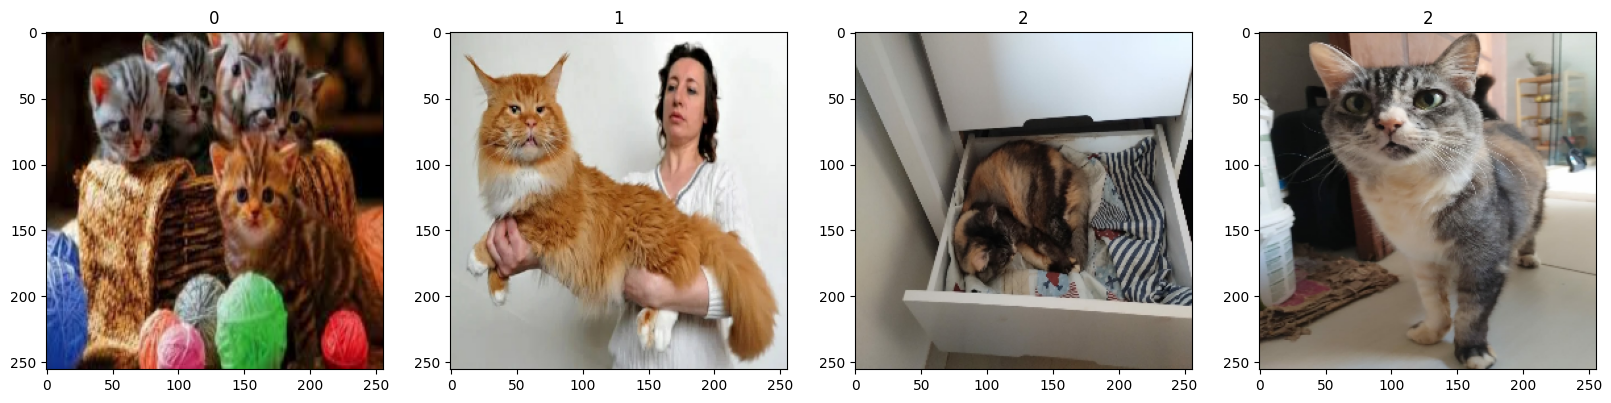

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[9.38572288e-02, 4.28768396e-02, 7.58272037e-03],
          [8.86335820e-02, 3.76531854e-02, 3.14031867e-03],
          [8.10508579e-02, 3.00704651e-02, 0.00000000e+00],
          ...,
          [1.04580268e-01, 6.53645843e-02, 2.09099259e-02],
          [1.18443631e-01, 7.29473010e-02, 2.58884802e-02],
          [1.21568628e-01, 7.45098069e-02, 2.74509806e-02]],
 
         [[9.58946049e-02, 4.49142158e-02, 9.62009840e-03],
          [9.06709582e-02, 3.96905653e-02, 4.77181235e-03],
          [8.30882341e-02, 3.21078449e-02, 0.00000000e+00],
          ...,
          [1.03903800e-01, 6.46881089e-02, 2.02334542e-02],
          [1.18443631e-01, 7.29473010e-02, 2.58884802e-02],
          [1.21568628e-01, 7.45098069e-02, 2.74509806e-02]],
 
         [[9.93412957e-02, 4.83609065e-02, 1.30667891e-02],
          [9.41176489e-02, 4.31372561e-02, 7.84313772e-03],
          [8.65349248e-02, 3.55545357e-02, 1.30310061e-03],
          ...,
          [1.02756336e-01, 6.35406524e-02, 1.9085

# 4. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

mse

In [ ]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 6. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 1.5098 - accuracy: 0.3750 - val_loss: 1.1247 - val_accuracy: 0.3125
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 1.0580 - accuracy: 0.4167 - val_loss: 1.0626 - val_accuracy: 0.2500
Epoch 3/20
6/6 [==============================] - 19s 3s/step - loss: 0.9654 - accuracy: 0.5000 - val_loss: 0.9328 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 18s 3s/step - loss: 0.8911 - accuracy: 0.5990 - val_loss: 0.8400 - val_accuracy: 0.7188
Epoch 5/20
6/6 [==============================] - 19s 3s/step - loss: 0.7718 - accuracy: 0.7240 - val_loss: 0.7099 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 24s 4s/step - loss: 0.7772 - accuracy: 0.6615 - val_loss: 0.6929 - val_accuracy: 0.6875
Epoch 7/20
6/6 [==============================] - 24s 4s/step - loss: 0.6306 - accuracy: 0.7344 - val_loss: 0.6142 - val_accuracy: 0.7500
Epoch 8/20
6/6 [==================

# 7. Plot Performance

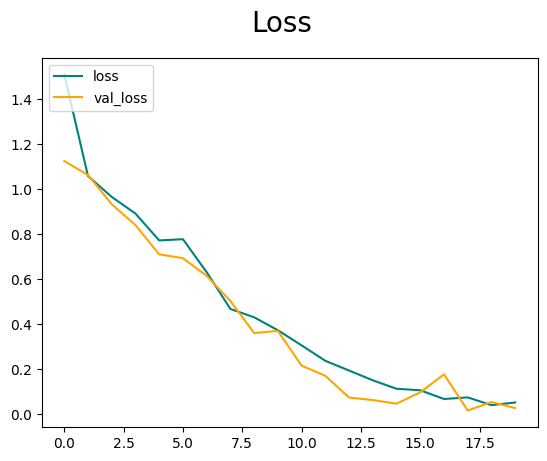

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

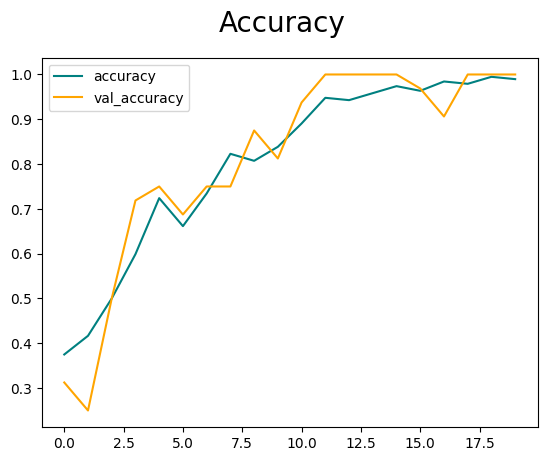

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat) # antes n tava dando erro mas agora q eu ajeitei lá em cima, tá dando erro, vai entender
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
for batch in test.as_numpy_iterator():
  x, y = batch
  print(y,yhat)
  print('----------')

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 9. Test

In [ ]:
import cv2

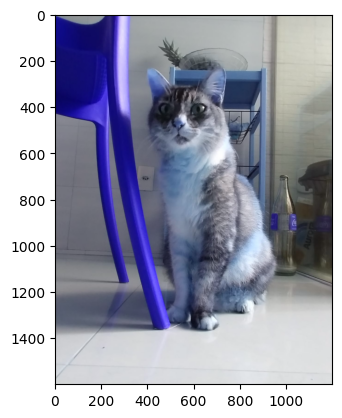

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/mima/55zFG6qxtkDZAv_D0YBOzkIf2CuQHDQYsD0f337usPg=_plaintext_638306934915677736.jpg')
plt.imshow(img)
plt.show()

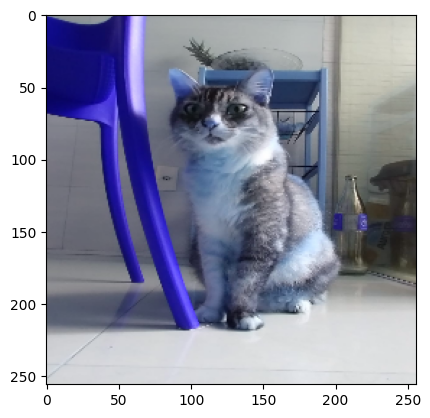

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 129ms/step


In [ ]:
yhat

array([[0.9971989 , 0.17634988, 0.9998965 ]], dtype=float32)

In [ ]:
print(yhat)
np.argmax(yhat)
classe = np.argmax(yhat)

[[0.9971989  0.17634988 0.9998965 ]]


In [ ]:
if classe >= 2:
    print("Esta é a imagem 'OMG ITS MIMA'")
elif classe >= 1:
    print("Esta é a imagem 'mainecon'")
else:
    print("Esta é a imagem 'apenas gato'")


Esta é a imagem 'OMG ITS MIMA'


# 10. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
